# A. Problem Statement

Users' retentention has always been one of the key targets that Momo is striving to be better. A Loyalty program called "Momo hoàn tiền" ,one of the projects aiming to achieve such goal, was launched on January 1st 2022. 




# B. Dataset.

**3 tables will be given:**

1. **Transactions**

*(daily transaction history data during Jan 2021-Mar 2022)*	
	
    - User_id: each user in MoMo will be given an unique id			
    - Order_id: each transaction will be given an unique id			
    - Date: date on which the transaction takes place			
    - GMV (Gross Merchandise Value): total amount of money that user spends (VND)			
    - Service Group: group services that users spend on			
    - Merchant_id: each merchant will be given a unique id			
2. **Loyalty Points**
    - Service Group: group services that users spend on						
    - Point Mechanism: each group services will be given a specific rule to calculate the accumulated point in the loyalty program						
    - Maximum Point Per Trans: limit of how many point a user can get for one transactions						
3. **Loyalty benefits**
    - Class ID: users ' ranking ID according to amount of loyalty points accumulated												
    - "% Cashback: percentage amount of money that returns to user's wallet after spending an a Momo's service
    Example: User A spends 100,000 VND on supermarket service. User A then have 5,000 VND (5%) cashback to their wallet."												

Notes:
- 2 & 3 is Loyalty program's rules to measure and analyse trend
- Points calculated for each transaction will be expired after 30 days since the day that transaction is made
- User's rank will be reduced or increased accordingly to the change of their accumulated loyalty points.
- Cashback cost can be calculated by multiplying %cashback with GMV
- User can only claim maximum of 10,000 VND per transaction

# C. Guilines


##### 1. At the end of March, 77% of users is in STANDARD rank.

##### 2. There are positive responses from customer to 'MoMo hoan tien'

##### 3. Weekly retention ratio has been increasing  since program was launched

##### 4. Still in launching time( Jan-March 2022), there is a trend in expanding Revenue + User Retention compare to this time last year (Jan-March 2021

##### 5. Ideas to design programs in order to attract monthly user retention

##### 6. Who is stickines to gamification ?



# D. Solution

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

In [52]:
transactions=pd.read_excel(r"D:\DA on da way\OverAll Course Lv1\Level 3 Python start 30062023\Class 4 Visual case momo\2022 Case challenge_ DA update.xlsx", sheet_name='Transactions')
loyaltypoints=pd.read_excel(r"D:\DA on da way\OverAll Course Lv1\Level 3 Python start 30062023\Class 4 Visual case momo\2022 Case challenge_ DA update.xlsx", sheet_name='Loyalty Points')
loyaltybenefits=pd.read_excel(r"D:\DA on da way\OverAll Course Lv1\Level 3 Python start 30062023\Class 4 Visual case momo\2022 Case challenge_ DA update.xlsx", sheet_name='Loyalty benefits')



###  1 .  At the end of March 2022. How many user are there in each rank ?


First, combine with the 'Loyalty Points' table:
- add a column 'Loyalty Points' in 'Transactions' table with given rules.
- create another table named 'Loyalty Ranking'. 

As 'Momo hoan tien was launched start from 01/2022 -> I decide to filter the dataframe to get all data from 1/2022 -> 03/2022


In [53]:
#filter data
program_transactions=transactions.loc[transactions['DATE'] >= '2022-01-01'].reset_index() 

# add loyalty points column
loyalty_points = []
for index, row in program_transactions.iterrows():
  if row['Service Group'] in ['supermarket', 'marketplace', 'Coffee chains and Milk tea']:
    if row['GMV']/1000 < 500:
      loyalty_points.append(row['GMV']/1000)
    else: loyalty_points.append(500)
  if row['Service Group'] == 'data':
    if row['GMV']/100 < 1000:
      loyalty_points.append(row['GMV']/100)
    else: loyalty_points.append(1000)
  if row['Service Group'] in ['cvs','Offline Beverage']:
     if row['GMV']/1000 < 300:
      loyalty_points.append(row['GMV']/1000)
     else: loyalty_points.append(300)
            
program_transactions['Loyalty points'] = loyalty_points
program_transactions.head()

,index,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty points,Rank,%cash back
0,30362,2022-01-01,19502954801,Supermarket,25,45715492,41400,supermarket,41.4,NaN,NaN
1,30363,2022-01-01,19492487660,CVS,28,41720789,205000,cvs,205.0,NaN,NaN
2,30364,2022-01-01,19491373621,CVS,28,55200938,237000,cvs,237.0,NaN,NaN
3,30365,2022-01-01,19485025779,CVS,28,17144057,17000,cvs,17.0,NaN,NaN
4,30366,2022-01-01,19497349350,Marketplace,37,46410460,340000,marketplace,340.0,NaN,NaN


Then, Create new table 'Loyalty Ranking'

In [54]:
# Initialize list of list
data=[['1', 'STANDARD', '1-999 points'],
                ['2', 'SILVER', '1000-1999 points'],
                ['3', 'GOLD', '2000-4999 points'],
                ['4', 'DIAMOND', '>=5000 points']]

# Create df
loyaltyranking=pd.DataFrame(data, columns=['Class ID', 'Rank_name','Loyalty Points'])

loyaltyranking.head()


,Class ID,Rank_name,Loyalty Points
0,1,STANDARD,1-999 points
1,2,SILVER,1000-1999 points
2,3,GOLD,2000-4999 points
3,4,DIAMOND,>=5000 points


As Points calculated for each transaction will be expired after 30 days since the day that transaction is made. Then user's rank will be reduced | or increased accordingly to the change of their accumulated loyalty points.

->Now do calculate the client's calculated point from 2/3/2022 to 31/03/2022



In [55]:
program_transactions.head()
# lọc ngày 
march_ranking=program_transactions.loc[(program_transactions['DATE'] >= '2022-03-02') & (program_transactions['DATE'] <= '2022-04-01')].reset_index()

# group by customer to identify total loyalty points
march_ranking=march_ranking.groupby('User_id').sum()['Loyalty points'].reset_index()

# Based on their points, identify rank of each customer
march_ranking['Rank']=march_ranking.apply(lambda row: 'STANDARD' if row['Loyalty points'] < 1000
                                                    else 'GOLD' if row['Loyalty points'] < 2000
                                                    else 'SILVER' if row['Loyalty points'] < 5000
                                                    else 'DIAMOND', axis=1)
#result
march_ranking['Rank'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9852\3401657054.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  march_ranking=march_ranking.groupby('User_id').sum()['Loyalty points'].reset_index()


STANDARD    1490
GOLD         294
SILVER       123
DIAMOND       14
Name: Rank, dtype: int64

Answer : Here there are the number of user in each rank, with 77% users get STANDARD rank

### 2. Add column '%cashback' in tbl Transactions.  Calculate the total cashback cost in each month.

In order to add %cashback, we need to now what the rank of customer in the given time is. The customer's rank will be calculated based on accumulated point of previous 30 days till the given time.So I take on by 2 steps:
- step 1 : Calculate rank of customer (using def)
- step 2 : Calculate cashback (using lambda)

In [6]:
# step 1:
def calculate_loyalty_point(user,date):
    user_transactions=program_transactions[program_transactions['User_id'] == user]
    upper_filter=user_transactions['DATE'] <= date
    lower_filter=user_transactions['DATE'] >= (date - timedelta(days=30))
    within_30d_transactions=user_transactions[upper_filter & lower_filter]
    accumulated_loyalty_points=within_30d_transactions['Loyalty points'].sum()
    return accumulated_loyalty_points
# step 2: Dùng function return phía trên để tính accumulated loyalty point trong 30 ngày của toàn bộ KH vào các thời điểm khác nhau
program_transactions['30 days accumulated loyalty points'] = program_transactions.apply(lambda row: calculate_loyalty_point(row['User_id'],row['DATE']), axis=1)




In [7]:
# add class id for each customer in the given time
program_transactions['Class ID'] = program_transactions.apply(lambda row: 1 if row['30 days accumulated loyalty points'] <1000
                                                                             else 2 if row['30 days accumulated loyalty points'] <2000
                                                                             else 3 if row['30 days accumulated loyalty points'] < 5000
                                                                             else 4, axis=1)
# add Rank of client in specific time
program_transactions['Rank'] = program_transactions.apply(lambda row: 'STANDARD' if row['30 days accumulated loyalty points'] <1000
                                                                             else 'SILVER' if row['30 days accumulated loyalty points'] <2000
                                                                             else 'GOLD' if row['30 days accumulated loyalty points'] < 5000
                                                                             else 'DIAMOND', axis=1)

In [8]:
# merge program_transactions vs loyaltybenefits to get %cashback
program_transactions = program_transactions.merge(loyaltybenefits, left_on = ['Service Group', 'Class ID'], right_on = ['Group', 'Class ID'], suffixes=(True,False))

#drop overlap column name.
program_transactions.drop(program_transactions.columns[[9,10]], axis=1, inplace=True) #drop column index 9 n 10

# add Cashback column: the amount of cashback/transactions
program_transactions['Cashback']= program_transactions.apply(lambda row: row['GMV']*row['%cashback']/100 if row['GMV']*row['%cashback']/100 < 10000 else 10000, axis=1)

#extract month from date
program_transactions['Month']=program_transactions['DATE'].dt.month

# Sum of Cashback by month
program_transactions.groupby('Month').sum()['Cashback']

C:\Users\Admin\AppData\Local\Temp\ipykernel_9852\1235103022.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  program_transactions.groupby('Month').sum()['Cashback']


Month
1     6975217.09
2     4668841.74
3    13478050.04
Name: Cashback, dtype: float64

Answer: Total cash back in
- Jan : 6.975.217d
- Feb : 4.668.841d
- Mar : 13.478.050

We start to **see positive response from customer to new program 'Momo hoan tien**. Now, let's take a look at weekly retention chart since the program was launched to monitor

### Part 3:  Design weekly **retention chart** since the program was launched to monitor

In [9]:
def weekly_retention(user,date):
    user_transactions= program_transactions[program_transactions['User_id']==user]
    upper_filter=user_transactions['DATE'] <= date
    lower_filter=user_transactions['DATE'] >= (date-timedelta(days=6))
    within_7d_transactions=user_transactions[upper_filter & lower_filter]
    if len(within_7d_transactions) ==1:
        return 0
    else:
        return 1

In [10]:
program_transactions['7 days retention'] = program_transactions.apply(lambda row: weekly_retention(row['User_id'], row['DATE']), axis=1)


In [11]:
# How many people comeback as retention ?
retention=program_transactions.groupby('DATE')['7 days retention'].sum().reset_index()
retention

,DATE,7 days retention
0,2022-01-01,4
1,2022-01-02,2
2,2022-01-03,10
3,2022-01-04,23
4,2022-01-05,34
...,...,...
85,2022-03-27,187
86,2022-03-28,124
87,2022-03-29,194
88,2022-03-30,117


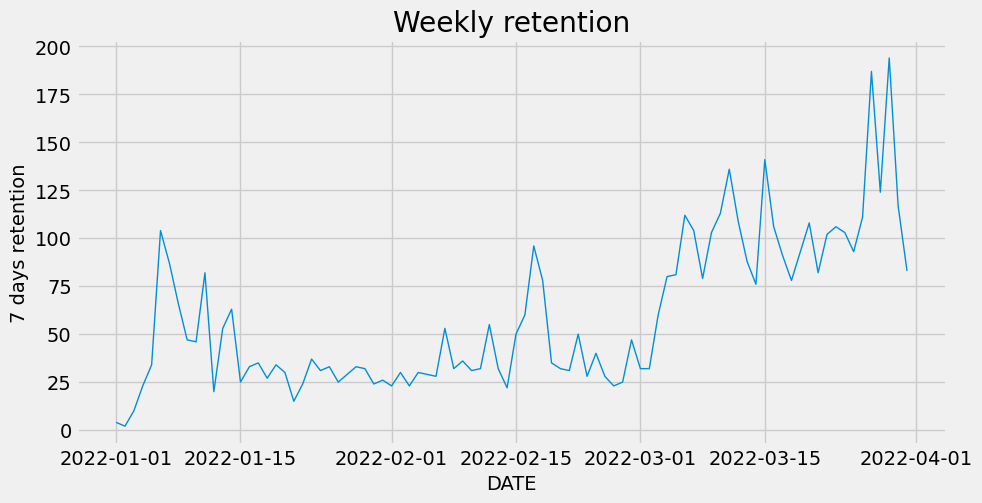

In [12]:
date=retention['DATE']
retentionnumb=retention['7 days retention']

plt.style.use('fivethirtyeight')

fig, ax=plt.subplots(figsize=(10,5))
ax=sns.lineplot(x=date, y=retentionnumb, linewidth=1)
plt.title('Weekly retention')
plt.show()

Answer: After 2 months of acquaiting with new program, **customer start to stick to use Momo service more in weekly retention** till the time of analysing. Needs more data to see further. But till now, it's a good sign to craft the program speaks for customer while increasing revenue for company.

### 4. Next, Is there any trend in User retention and transaction behavior ?

In [13]:
# Có trend nào xuất hiện giữa User Retention và transactions behavior ko ?
# Để trả lời câu hỏi này, tạo line chart với total khách mỗi ngày và total GMV by day.
# In order to shed light on this wonder, I create a line chart between total customer and GMV by day

trend=program_transactions.groupby('DATE').agg({'GMV':'sum', 'User_id':'count'}).reset_index()
trend.head()

,DATE,GMV,User_id
0,2022-01-01,246000,4
1,2022-01-02,370000,4
2,2022-01-03,4342800,11
3,2022-01-04,5378000,25
4,2022-01-05,12666673,36


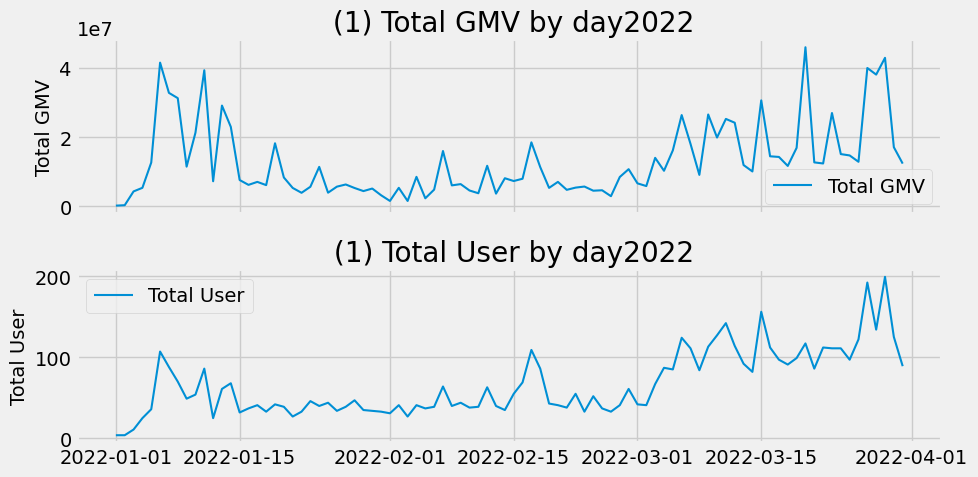

In [14]:
#create plot 2022
date= trend['DATE']
gmv=trend['GMV']
totaluser=trend['User_id']

fig,(ax1, ax2)=plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,5))
plt.style.use('fivethirtyeight')

ax1.plot(date, gmv,linewidth=1.5, label='Total GMV')
ax2.plot(date, totaluser,linewidth=1.5, label='Total User')

ax1.legend()
ax1.set_title(' (1) Total GMV by day2022')
ax1.set_ylabel('Total GMV')

ax2.legend()
ax2.set_title(' (1) Total User by day2022')
ax2.set_ylabel('Total User')

plt.tight_layout()

plt.show()


In [15]:
# So sánh với 1->3 2021

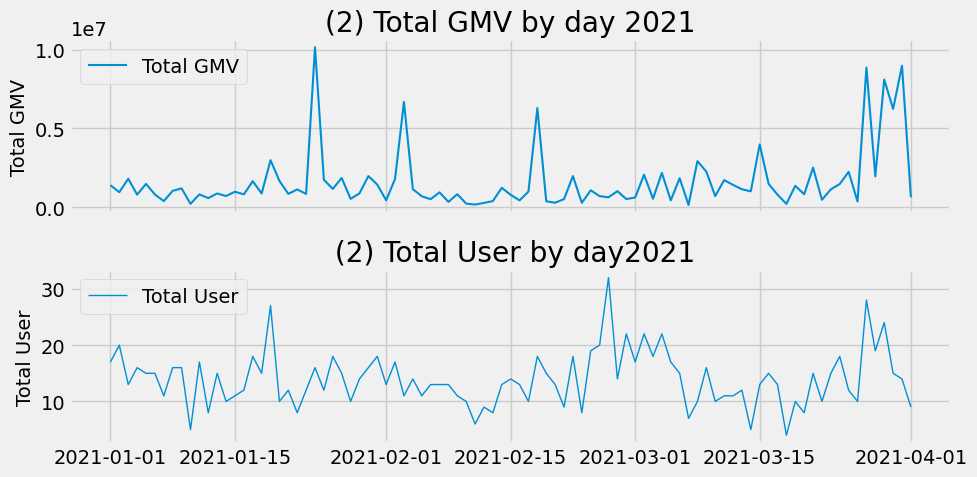

In [16]:
# Compare to this time last year 2021 (when the program wasnt launched)
transactions2021=transactions.loc[(transactions['DATE'] >= '2021-01-01') & (transactions['DATE'] <= '2021-04-01')]
trend2021=transactions2021.groupby('DATE').agg({'GMV':'sum', 'User_id':'count'}).reset_index()

# create plot 2021
date= trend2021['DATE']
gmv=trend2021['GMV']
totaluser=trend2021['User_id']

fig,(ax1, ax2)=plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,5))
plt.style.use('fivethirtyeight')

ax1.plot(date, gmv,linewidth=1.5, label='Total GMV')
ax2.plot(date, totaluser,linewidth=1, label='Total User')

ax1.legend()
ax1.set_title('(2) Total GMV by day 2021')
ax1.set_ylabel('Total GMV')

ax2.legend()
ax2.set_title(' (2) Total User by day2021')
ax2.set_ylabel('Total User')

plt.tight_layout()

plt.show()


- In 2022, the total user and user has a uptrend through the time (chart 1). There are some reason could be explained for this trend:
    - The service acquires more customer by the time.
    - The new program 'Momo hoan tien was launched
    ...
- Compared to the 2021 (chart 2), the line fuctuated without any trend.

-> **More or less, 'Momo hoan tien' contribute to this uptrend**.


### Part 5 :Based on data, is there any recommendation for marketing department in desgin programs in order to attract monthly user retention ?

In [17]:
# look at all data.
transactions['Month'] = transactions['DATE'].dt.month.astype(str)
transactions['Year'] = transactions['DATE'].dt.year.astype(str)

transactions ['Month-Year']= transactions['Month'] + '-' + transactions['Year']

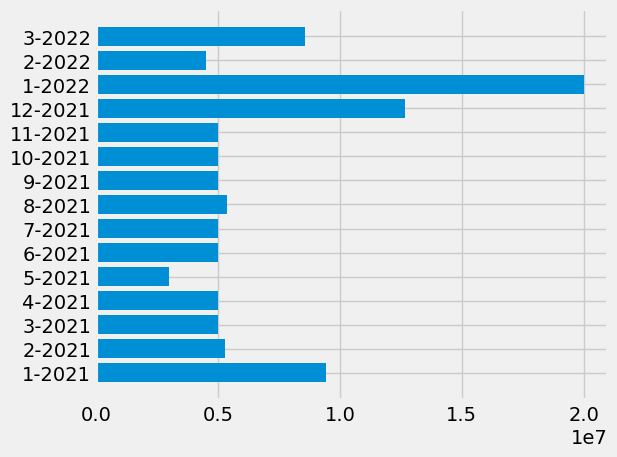

In [37]:
#create plot : Total GMV by day
date= transactions['Month-Year']
gmv=transactions['GMV']
totaluser=transactions['User_id']

plt.barh(date, gmv)
#plt.set_title('Total GMV by month')

plt.tight_layout()

plt.show()

In the overall given data, there is no significant different between months, except December & January, this is a festive season then user have a tendency to purchase more than usual. It points out:
    - **Momo service have an amount of loyalty user**.
    - **But the the its operation does not enough to attract more user to spend money through this way**.
    
**Suggestion for growth**:
Planing 1 core campaign for each month with themes would be a good way to:
- attract user retention -> improve GMV
- acquire new user
- raise awareness branding.

How it can be good ?
- As a business, we cant only depend on the festive season to growth because we do much more than that. Acquire & built loyalty customer database through the year could be a way to raise GMV + expand the market. Then When festive season comes, it would be an rewarded for company.

(Want to discuss more ? I would love to have a conversation about it with you)

In [19]:
service=program_transactions.groupby('Group')['GMV','Cashback'].sum().sort_values(by='GMV').reset_index()
service
#servicegr=service['Service Group']
#gmv=service['GMV']
#totalcashback=service['totalcashback']

C:\Users\Admin\AppData\Local\Temp\ipykernel_9852\3188908510.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  service=program_transactions.groupby('Group')['GMV','Cashback'].sum().sort_values(by='GMV').reset_index()


,Group,GMV,Cashback
0,Offline Beverage,685000,34250.00
1,data,62385100,3645485.00
2,cvs,88383028,5145994.42
3,supermarket,113447958,1666154.72
4,marketplace,901691495,14630224.73


In [20]:
service['GMV %']=service['GMV']*100/ service['GMV'].sum()
service['Cashback percent']=service['Cashback']*100/ service['Cashback'].sum()

In [21]:
service[['Group','GMV %','Cashback percent']]


,Group,GMV %,Cashback percent
0,Offline Beverage,0.058718,0.136334
1,data,5.347634,14.511063
2,cvs,7.576169,20.483927
3,supermarket,9.724728,6.632225
4,marketplace,77.292751,58.236451


As we can see from table chart:

  - While **data's GMV is 50%** as high as supermarket'GMV, **its cashback is twice** as high as the supermarket
  - While **csv's GMV is 70%** as high as supermarket'sGMV, **its cashback is third times** as high as the supermarket

-> **the %cashback of data and csv is overrewarded.** -> Why and How it is overrewarded ?


In [34]:
# To see how and where it is overrewarded, I analyse the characteristics of each service group.

In [23]:
group=program_transactions['Group'].value_counts().reset_index()
group

,index,Group
0,marketplace,2198
1,data,1803
2,cvs,1658
3,supermarket,346
4,Offline Beverage,12


From group and loyaltypoints dataframe:

Service Group_____%cashback by Class

- cvs__________ 5 | 7| 12 -> big group, small bill, generous discount percent, happens frequently
- data _________ 5 | 7| 12 -> big group, small bill, generous discount percent, happens frequently
- supermarket___ 0 | 2| 5  -> big group, small bill, generous discount percent, happens frequently
- marketplace___ 0 | 2| 5  -> small group, big bill, happens less frequently

In cvs & data service group, there are:
 - significant customer using service 
 - with small bill
 - happens frequently 
 - with %cashback is generous

-> it could be explained for the reason why their GMV is inverse ratio to its amount of cashback

-> Now, based on the characteristics of people using each Service Group, we could **craft the %cashback of each Class ID of cvs & data** to alleviate the cost amount in order to optimize the cost while still keeping growth of GMV and increasing the retention rate

Part  6 : Gamification is usually a sensible option for apps to raise users’ stickiness. In our loyalty program development strategy, we also plan to hold a small game for users. The rule is simple: any users who can maintain a 20-day or longer streak of being in the DIAMOND ranking is a winner (in other words, winners are users who have total loyalty points greater than or equal to 5,000 for at least 20 consecutive days). We also want to give a special reward for the user(s) who can maintain the longest streak.
#### Now, calculate how many winners were there during the last thirty days in the given data (March 01 - March 31) and who was/were the one(s) boasting the longest streak during that time?


In [24]:
program_transactions.head()

,index,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty points,30 days accumulated loyalty points,Class ID,Rank,Group,%cashback,Cashback,Month,7 days retention
0,30520,2022-01-01,19501183290,Paid bank cashin,41,52564085,120000,data,1000.0,2000.000,3,GOLD,data,7,8400.0,1,1
1,30545,2022-01-01,19501213885,Airtime,41,52564085,120000,data,1000.0,2000.000,3,GOLD,data,7,8400.0,1,1
2,31176,2022-01-04,19545831486,Airtime,41,42076614,150000,data,1000.0,2000.000,3,GOLD,data,7,10000.0,1,1
3,31178,2022-01-04,19545831498,Paylater,41,42076614,150000,data,1000.0,2000.000,3,GOLD,data,7,10000.0,1,1
4,31605,2022-01-06,19592282896,Airtime,30,39956101,100000,data,1000.0,2142.442,3,GOLD,data,7,7000.0,1,1


In [25]:
first= program_transactions['DATE']>='2022-03-01'
last = program_transactions['DATE'] < '2022-04-01'
march=program_transactions[first & last]
march_diamond=march[march['Class ID'] == 4]
march_diamond

,index,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty points,30 days accumulated loyalty points,Class ID,Rank,Group,%cashback,Cashback,Month,7 days retention
4847,42499,2022-03-01,21511066166,Airtime,43,12229364,20000,data,200.0,7853.900,4,DIAMOND,data,12,2400.0,3,1
4848,42610,2022-03-01,21508811945,Airtime,41,57207697,125000,data,1000.0,5875.400,4,DIAMOND,data,12,10000.0,3,1
4849,42612,2022-03-01,21530933078,Airtime,41,57207697,90000,data,900.0,5875.400,4,DIAMOND,data,12,10000.0,3,1
4850,42619,2022-03-01,21530334048,Airtime,41,57207697,90000,data,900.0,5875.400,4,DIAMOND,data,12,10000.0,3,1
4851,44348,2022-03-07,21692149784,Airtime,41,50185392,150000,data,1000.0,5130.037,4,DIAMOND,data,12,10000.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000,52127,2022-03-30,22483127932,CVS,28,55200938,94000,cvs,94.0,7031.182,4,DIAMOND,cvs,12,10000.0,3,1
6001,52448,2022-03-31,22526758425,CVS,8,55200938,30000,cvs,30.0,7536.602,4,DIAMOND,cvs,12,3600.0,3,1
6002,52462,2022-03-31,22526761208,CVS,8,55200938,91000,cvs,91.0,7536.602,4,DIAMOND,cvs,12,10000.0,3,1
6003,52593,2022-03-31,22526761208,CVS,8,55200938,91000,cvs,91.0,7536.602,4,DIAMOND,cvs,12,10000.0,3,1


In [26]:
march_timeline=pd.date_range(start='2022-03-01', end='2022-03-31')
date_col=[]
uid_col=[]
for user_id in march_diamond['User_id'].unique():
    for date in march_timeline:
        uid_col.append(user_id)
        date_col.append(date)
march_users=pd.DataFrame(
        {'User_id': uid_col,
        'DATE': date_col})

In [27]:
# Check if the timeline include 31 days for each user ID
march_users['User_id'].value_counts()

12229364    31
57207697    31
35461466    31
44850195    31
31244414    31
55443594    31
25993024    31
54960619    31
43933779    31
45426067    31
43160536    31
44901759    31
55200938    31
51432947    31
47662326    31
54788782    31
39314846    31
39619396    31
49689927    31
36884902    31
50185392    31
44119627    31
Name: User_id, dtype: int64

In [28]:
march_users['Loyalty Points']= march_users.apply(lambda row: calculate_loyalty_point(row['User_id'], row['DATE']), axis=1)
march_users=march_users.sort_values(by=['User_id', 'DATE'])

In [29]:
loyalty_points= list(march_users['Loyalty Points'])
day_count=[]
a=0
for entry in loyalty_points:
    if len(day_count) % 31 == 0:
        a=1
        day_count.append(a)
    else:
        if entry>=5000:
            a=a+1
            day_count.append(a)
        else:
            a=1
            day_count.append(a)
            
march_users['Consecutive day count'] = day_count
    

In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision',3):
    print(march_users)
    


      User_id       DATE  Loyalty Points  Consecutive day count
0    12229364 2022-03-01        7353.900                      1
1    12229364 2022-03-02        7353.900                      2
2    12229364 2022-03-03        7353.900                      3
3    12229364 2022-03-04        7545.806                      4
4    12229364 2022-03-05        7545.806                      5
5    12229364 2022-03-06        7545.806                      6
6    12229364 2022-03-07        6382.006                      7
7    12229364 2022-03-08        6382.006                      8
8    12229364 2022-03-09        5943.506                      9
9    12229364 2022-03-10        5443.506                     10
10   12229364 2022-03-11        5443.506                     11
11   12229364 2022-03-12        4291.606                      1
12   12229364 2022-03-13        3198.106                      1
13   12229364 2022-03-14        3424.806                      1
14   12229364 2022-03-15        3424.806

In [42]:
result= march_users.groupby('User_id')['Consecutive day count'].max().reset_index()
result[result['Consecutive day count'] >= 20].sort_values(by = 'Consecutive day count', ascending= False).reset_index()

,index,User_id,Consecutive day count
0,5,39314846,31
1,13,47662326,31
2,21,57207697,31
3,16,51432947,28
4,7,43160536,22
5,15,50185392,22
6,19,55200938,21


Result : There are 7 users maitains Diamond Rank for at least 20 days. 3 users have the most days with 31 days.